In [1]:
#import necessary libraries
import pandas as pd
import numpy as np3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

# EDA(Exploratory Data Analysis)

In [5]:
#check the number of rows having null values for each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# impute the null value where neccesary; 
# I can neglect the cabin because I think the cabin number, on itself, is not an enough info that can explain the survival 

df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
# check again for null value after updating the Age column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# lets drop the Cabin column now
df.drop('Cabin', axis=1, inplace=True)

In [9]:
# check the drop column success

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
# Now, 'Embarked' column has two rows where the value is NA. Since 2 is very less compared to total of 
# 891 rows, we can drop these two rows without affecting the model.
df.dropna(inplace=True)

In [11]:
# confirm our drop execution : 889 entries out of total 889 are not null in Embarked as well as other columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
#drop other non significant columns
df.drop(['PassengerId','Name','Ticket','Embarked'],axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [14]:
# Check if the target we want to predict is balanced or not

df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

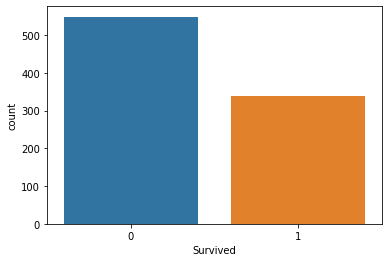

In [15]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='count'>

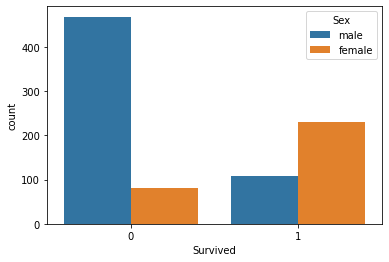

In [16]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [17]:
# now converting our object data type i.e column 'Sex' to category type. 
# using one hot encoding

df['Sex']=pd.get_dummies(df['Sex'], drop_first=True)

In [20]:
df['Sex'].head(4)

0    1
1    0
2    0
3    0
Name: Sex, dtype: uint8

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [22]:
# so we are now good to go with our logistic regression model

# LOGISTIC REGRESSION MODEL

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
#taking all the columns except the target column/variable as the features for model
# and only the target variable into y 
X=df.drop('Survived',axis=1)
y=df['Survived']

In [26]:
#spliting the X, y variables into train and test dataset with 75-25 proportion
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=15)

In [28]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(666, 6)
(666,)
(223, 6)
(223,)


In [32]:
# import library for LR and create an instance
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [33]:
# fitting the model
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [34]:
# now predicting the outcome as per the training data
ypred_train=lr.predict(Xtrain)

In [36]:
# we want to know how the training data performed 
from sklearn.metrics import accuracy_score
print("training accuracy is : ", accuracy_score(ytrain,ypred_train))


training accuracy is :  0.8063063063063063


In [37]:
# predict the outcome as per the testing data
ypred_test=lr.predict(Xtest)

In [38]:
# accuracy of model on testing data
print("testing accuracy is : ", accuracy_score(ytest,ypred_test))

testing accuracy is :  0.7892376681614349


In [ ]:
# so our accuracy is somewhat 79% on test data which was 80% on training. So we can say that our model is not overfitting.
# of course there is room for improvement. We can use more techniques like feature engineering to improve the score. 
# But this was for getting familiar with Logistic Regression.
# You are welcome to try improving this and ping me back. 
# Thanks,
# Abhishek.
# abhishek@autotechpl.com